In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [40]:
df = pd.read_csv("House_Data/data.csv", sep=",")

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

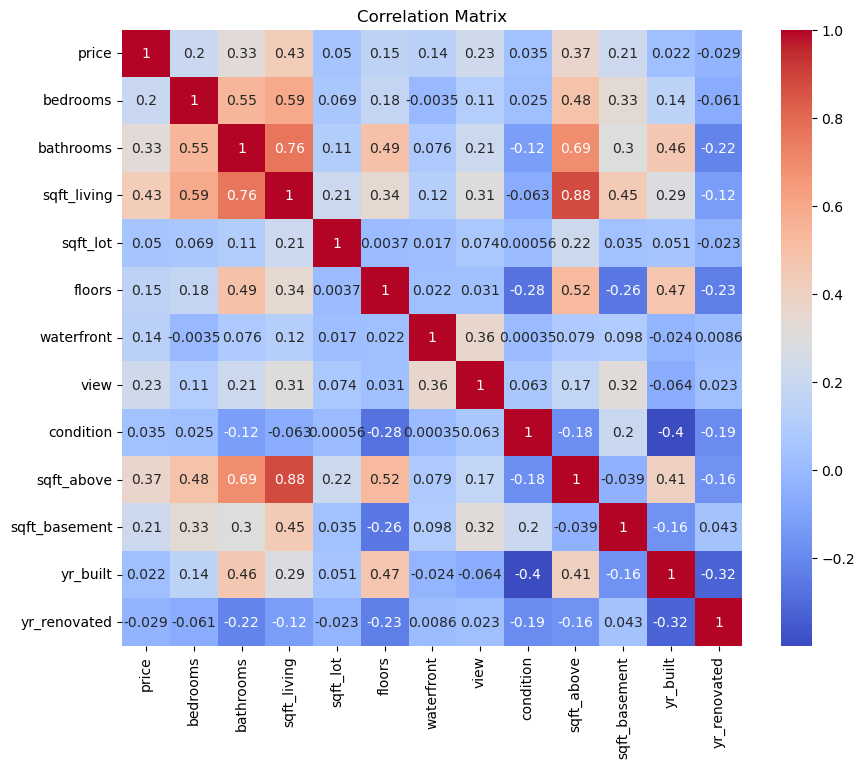

In [42]:
# Generate a heatmap using Seaborn's heatmap function
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

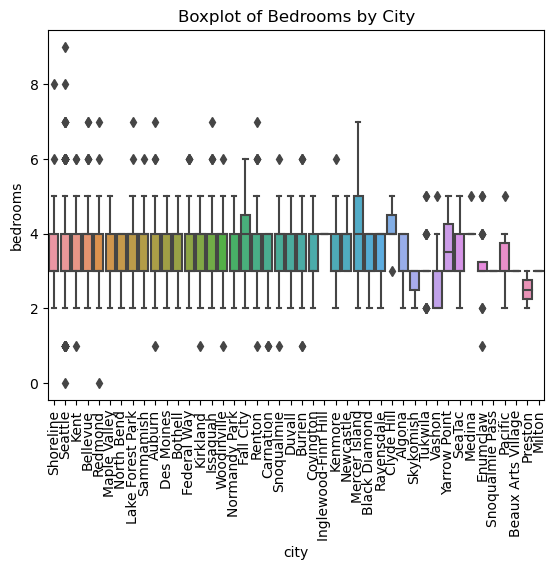

In [43]:
# plot the number of bedrooms on the y-axis and the city on the x-axis
sns.boxplot(x='city', y='bedrooms', data=df)
plt.title('Boxplot of Bedrooms by City')
plt.xticks(rotation=90)
plt.show()

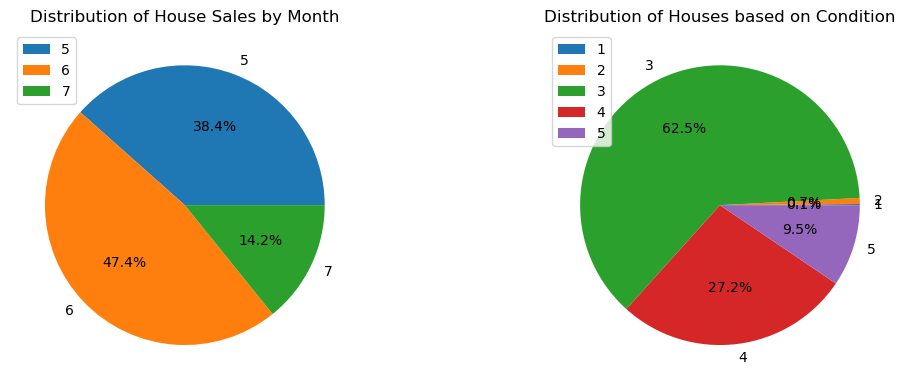

In [44]:
# Visualize Data Distribution with Pie Charts
# Utilize pie charts to visually represent the distribution of house sales by month and the distribution of houses based on their condition.
df["date"] = pd.to_datetime(df["date"])

grouped_dates = df.groupby(df["date"].dt.month)
grouped_condition = df.groupby(df["condition"])

dates_per_group = grouped_dates.size()
condition_per_group = grouped_condition.size()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].pie(dates_per_group, labels=dates_per_group.index, autopct="%1.1f%%")
axes[0].legend(loc="upper left")
axes[0].set_title("Distribution of House Sales by Month")

axes[1].pie(condition_per_group, labels=condition_per_group.index, autopct="%1.1f%%")
axes[1].legend(loc="upper left")
axes[1].set_title("Distribution of Houses based on Condition")

plt.tight_layout()
plt.show()

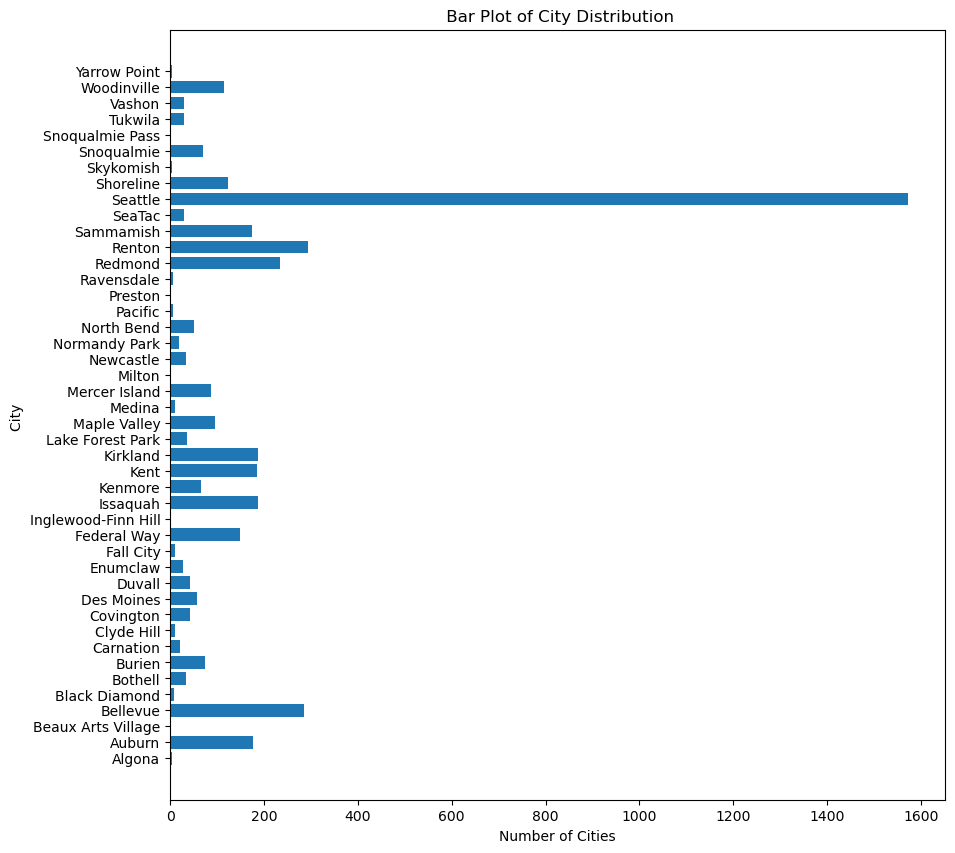

In [45]:
# Generate bar plot to visualize the distribution of cities in the dataset
city_code_groups = df.groupby('city')
city_counts = city_code_groups.size()

plt.figure(figsize=(10, 10))
plt.barh(city_counts.index, city_counts)
plt.xlabel("Number of Cities")
plt.ylabel("City ")
plt.title(" Bar Plot of City Distribution")
plt.show()

##### During analysis, I identified several features that do not significantly contribute to predicting home prices. These features include 'date,' 'yr_renovated,' 'street,' 'city,' 'statezip,' and 'country.' Categorical features like 'street,' 'city,' 'statezip,' and 'country' can indeed influence home prices, but they can be challenging to use directly in predictive models. My decision to exclude these features from my predictive modeling.

In [46]:
columns_to_remove = ['date', 'yr_renovated', 'street', 'city', 'statezip', 'country']
df = df.drop(columns=columns_to_remove)

In [47]:
# Remove outliers
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
z_scores = stats.zscore(df[numeric_columns])
threshold = 3
print("Size before removing outliers:", df.shape)
outliers_df = df[(z_scores > threshold).any(axis=1)]
df = df[(z_scores <= threshold).all(axis=1)]
print("Size after removing outliers:", df.shape)

Size before removing outliers: (4600, 12)
Size after removing outliers: (4244, 12)


In [48]:
outliers_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4.0,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4.0,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5.0,2.75,3190,16920,1.0,0,3,3,1690,1500,1976


In [49]:
df = df.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4244 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          4244 non-null   int64
 1   bedrooms       4244 non-null   int64
 2   bathrooms      4244 non-null   int64
 3   sqft_living    4244 non-null   int64
 4   sqft_lot       4244 non-null   int64
 5   floors         4244 non-null   int64
 6   waterfront     4244 non-null   int64
 7   view           4244 non-null   int64
 8   condition      4244 non-null   int64
 9   sqft_above     4244 non-null   int64
 10  sqft_basement  4244 non-null   int64
 11  yr_built       4244 non-null   int64
dtypes: int64(12)
memory usage: 431.0 KB


In [50]:
scaler = StandardScaler()

scaler.fit(df)

df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

#### Models Evaluated:

* Linear Regression: A fundamental linear modeling approach that assumes a linear relationship between input features and the target variable.
* Gradient Boosting: An ensemble learning technique that builds an additive model by training decision trees in a sequential manner.
* Gradient Boosting: An ensemble learning technique that builds an additive model by training decision trees in a sequential manner.

#### Evaluation Metrics:
For each model, I calculate two key metrics:

* Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower MSE indicates better predictive accuracy.
* R-squared (R^2) Score: Measures the proportion of variance in the target variable explained by the model. Higher R^2 scores indicate better explanatory power.

In [51]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)

# Create a list of models
models = [
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    
]

# Create an array to store the predictions
predictions = []

# Iterate over the list of models and train and evaluate each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Store the predictions in the array
    predictions.append((model_name, y_pred))

    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    mean_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)
    mean_r2 = np.mean(r2_scores)
    std_r2 = np.std(r2_scores)

    print(f'Model: {model_name}')
    print(f'Mean MSE: {mean_mse:.2f} (+/- {std_mse:.2f})')
    print(f'Mean R^2: {mean_r2:.2f} (+/- {std_r2:.2f})')
    print('--------------------------')

Model: Random Forest
Mean MSE: 39555616069.75 (+/- 1886664172.88)
Mean R^2: 0.42 (+/- 0.06)
--------------------------
Model: Linear Regression
Mean MSE: 38550079101.75 (+/- 1990398240.52)
Mean R^2: 0.44 (+/- 0.06)
--------------------------
Model: Gradient Boosting
Mean MSE: 37571654908.47 (+/- 1884640449.00)
Mean R^2: 0.45 (+/- 0.06)
--------------------------


#### Regression Model Visualization
In this section, I visually evaluate the performance of two regression models:Linear Regression, and Gradient Boosting Regression. The scatter plots illustrate the predictions made by each model against the actual target values.

##### Model Comparison:
By visually inspecting these scatter plots, we can identify patterns, trends, and potential outliers in the predictions. This visual assessment complements the quantitative evaluation using metrics such as Mean Squared Error and R-squared score. It helps us understand which model aligns better with the actual property prices and guides our decision on selecting the most suitable regression model for our task.

These visualizations serve as a valuable tool for model selection and provide insights into the strengths and weaknesses of each regression approach.

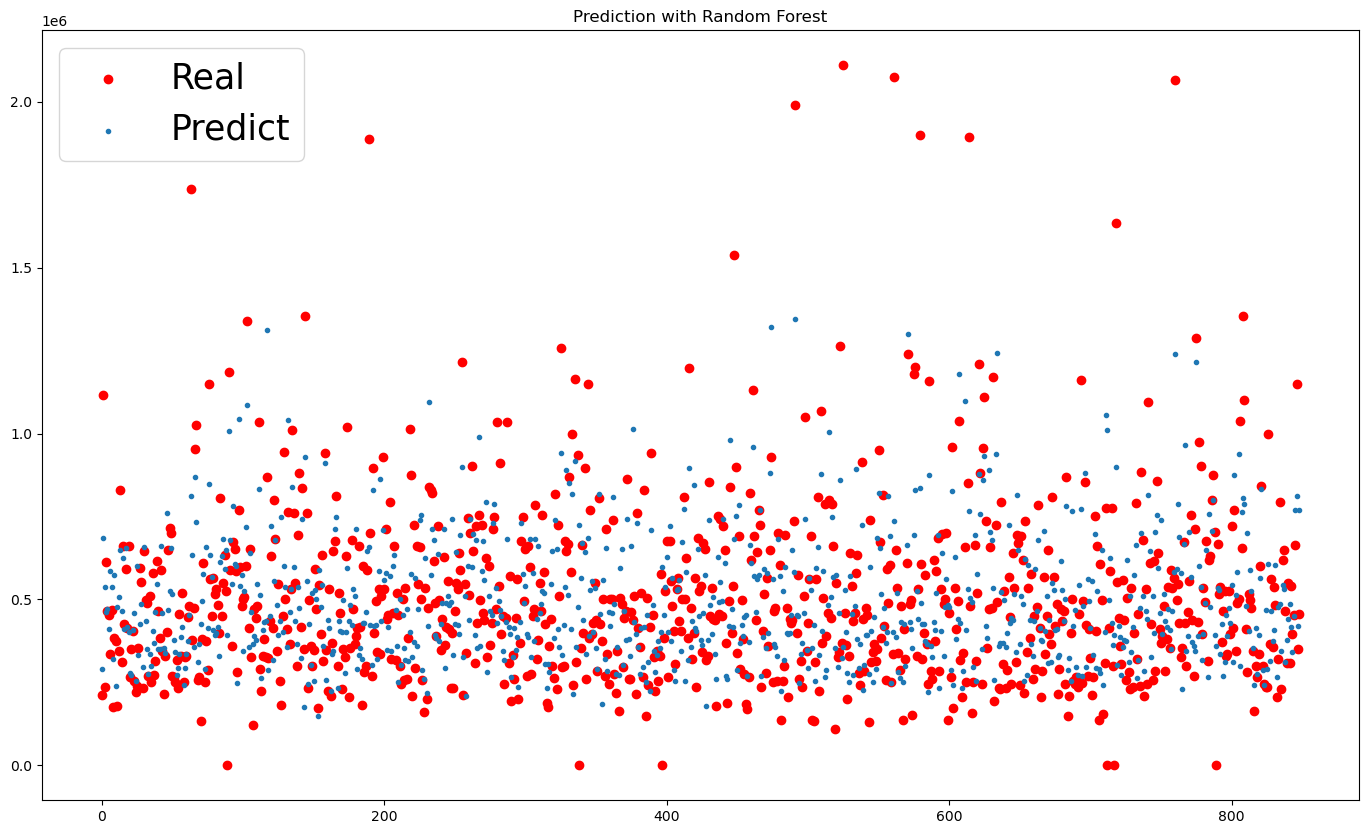

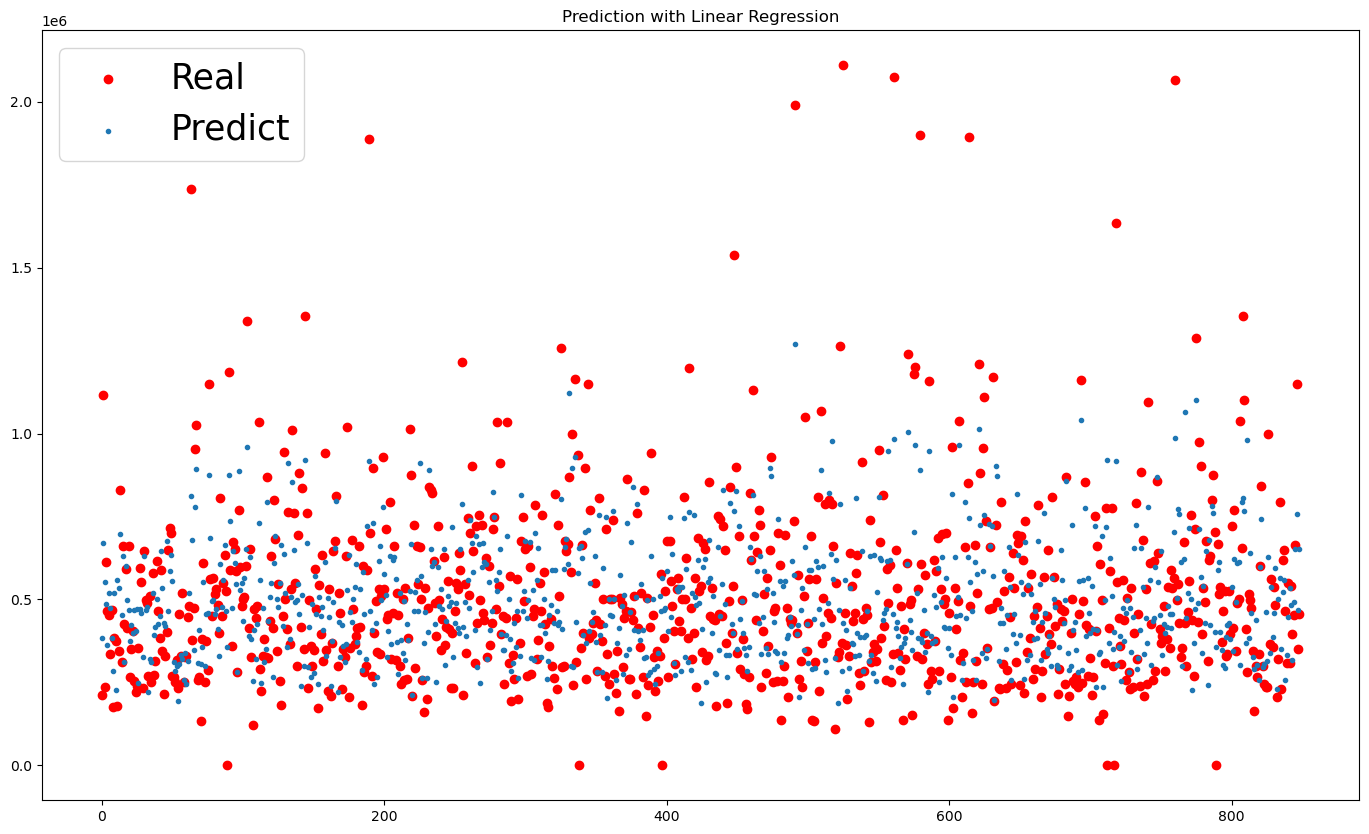

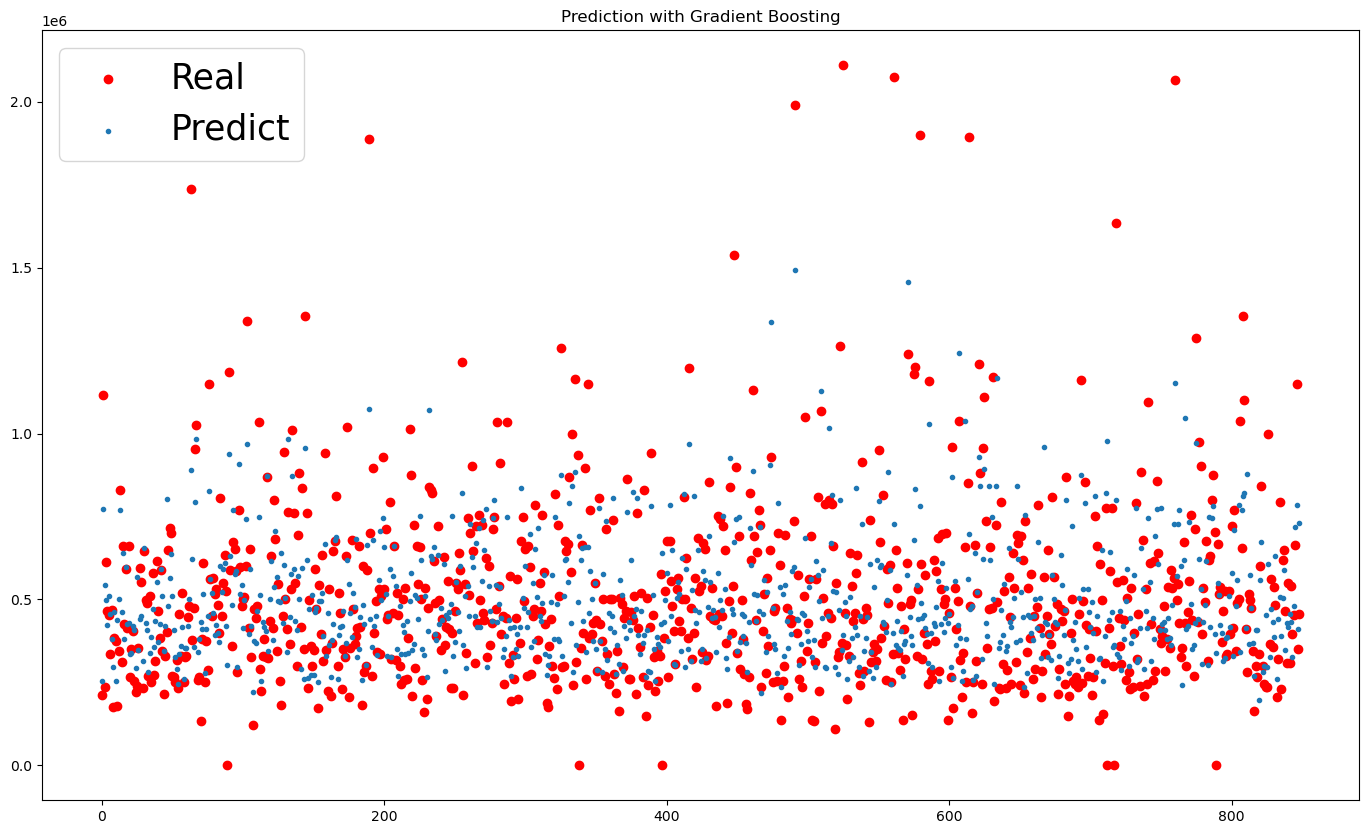

In [52]:
# Plot the actual and predicted values for each model
for model_name, y_pred in predictions:
    fig = plt.figure(figsize=(17, 10))
    plt.title(f"Prediction with {model_name}")
    plt.scatter(range(X_test.shape[0]), y_test, color='red', label='Real')
    plt.scatter(range(X_test.shape[0]), y_pred, marker='.', label='Predict')

    # Add legend and show the plot
    plt.legend(loc=2, prop={'size': 25})
    plt.show()

#### Analyze Predictions and Best Prediction Algorithm
This code is useful for evaluating and comparing the performance of multiple prediction algorithms on a dataset, ultimately helping to identify the algorithm that performs the best in terms of prediction accuracy.

In [53]:
def show_predictions_for_all_models(X, Y, predictions):
  """Shows the predictions error for both the 3 algorithms and the actual value.

  Args:
    df: A Pandas DataFrame containing the actual values.
    predictions: A list of tuples containing the model name and predictions.

  Returns:
    A Pandas DataFrame containing the actual and predicted values errors for all the models.
  """

  df_actual_vs_predicted = pd.DataFrame()

  df_actual_vs_predicted['Actual'] = Y

  for model_name, y_pred in predictions:
    df_actual_vs_predicted[model_name] =  ((Y - y_pred).abs())

    
  df_actual_vs_predicted['Best Prediction Algorithm'] = df_actual_vs_predicted.drop('Actual', axis=1).idxmin(axis=1)

  # Get the numeric columns in the DataFrame
  numeric_columns =  df_actual_vs_predicted.select_dtypes(include='number').columns

  # Format the numeric columns as money
  for column in numeric_columns:
      df_actual_vs_predicted[column] =  df_actual_vs_predicted[column].apply(lambda x: f'${x:.2f}')

  return df_actual_vs_predicted

In [54]:
df_actual_vs_predicted = show_predictions_for_all_models(X_test, y_test, predictions)
df_actual_vs_predicted.head()

,Actual,Random Forest,Linear Regression,Gradient Boosting,Best Prediction Algorithm
2156,$212500.00,$78600.15,$170185.65,$41325.68,Gradient Boosting
4114,$1115000.00,$428447.95,$445964.86,$342387.91,Gradient Boosting
4531,$234975.00,$302598.96,$317665.04,$307011.27,Random Forest
186,$612500.00,$151044.52,$127801.54,$114160.82,Gradient Boosting
2689,$465000.00,$5575.35,$101940.80,$42394.51,Random Forest


In [55]:
def calculate_best_prediction_counts_and_percentages(df):
  """Calculates the number of times each algorithm has the best prediction and the percentage of them.

  Args:
    df: A Pandas DataFrame containing the actual and predicted values for all the models.

  Returns:
    A Pandas DataFrame containing the number of times each algorithm has the best prediction and the percentage of them.
  """

  best_prediction_algorithm_column_name = df['Best Prediction Algorithm'].name

  best_prediction_counts = df[best_prediction_algorithm_column_name].value_counts()

  best_prediction_percentages = best_prediction_counts / len(df) * 100

  best_prediction_df = pd.DataFrame({'Best Prediction Algorithm': best_prediction_counts.index,
                                  'Count': best_prediction_counts.values,
                                  'Percentage': best_prediction_percentages.values})

  return best_prediction_df

In [56]:
best_prediction_df = calculate_best_prediction_counts_and_percentages(df_actual_vs_predicted)

best_prediction_df

,Best Prediction Algorithm,Count,Percentage
0,Random Forest,291,34.275618
1,Linear Regression,289,34.040047
2,Gradient Boosting,269,31.684335


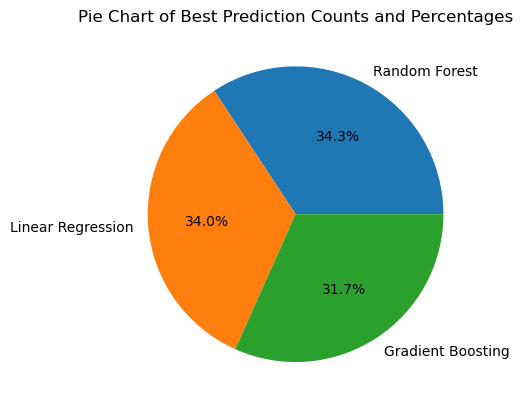

In [57]:
# Pie Chart Visualization
# The pie chart visually represents the distribution of the best prediction algorithms, showing the count and percentage of times each algorithm had the best prediction.
best_prediction_algorithm_names = best_prediction_df['Best Prediction Algorithm'].tolist()

best_prediction_counts = best_prediction_df['Count'].tolist()

best_prediction_percentages = best_prediction_df['Percentage'].tolist()

plt.pie(best_prediction_counts, labels=best_prediction_algorithm_names, autopct='%1.1f%%')
plt.title('Pie Chart of Best Prediction Counts and Percentages')
plt.show()